## Nome: Arthur Valls da Costa Silva - DRE: 120177470
## Nome: Pedro Guimarães Jambo       - DRE: 120156717

#Imports

In [ ]:
import sympy as sym
import numpy as np
import scipy as sp
import scipy.linalg
from matplotlib import pyplot as plt
from google.colab import files
import pandas as pd
import io
from numpy import arange

### Link: Dados covid19 - csv.csv: [Download](https://drive.google.com/file/d/1BsBLmqlOeL9Xi5lbKf5U-hl6yd-pvXzt/view)
### e lógica para upload do arquivo



In [ ]:
pass
# A seguinte lógica de upload só funciona com o arquivo Dados covid19 - csv.csv disponibilizado no classroom e para download no link acima
# O upload só funciona no navegador Chrome
uploaded = files.upload()
df=pd.read_csv(io.BytesIO(uploaded['Dados covid19 - csv.csv']),usecols=['order_for_place', 'last_available_confirmed','last_available_deaths', 'estimated_population'])

Saving Dados covid19 - csv.csv to Dados covid19 - csv (1).csv


#Converter as colunas para pandas dataframe:

In [ ]:
# dataset[:, i] -> retorna i-ésima coluna

dataset = df.values[0:500].astype(int)
dias = dataset[:, 0] 
populacao =  dataset[:, 3] 
casos = dataset[:, 1] * 100000/populacao # dividido para transformar para a escala de casos/100k habitantes
mortes = dataset[:, 2] * 100000/populacao # dividido para transformar para a escala de mortes/100k habitantes

#Funções utilizadas para plotar os gráficos:

In [ ]:
def ajuste_reta(x,y, nome_y):

  # Calculando os parametros da reta usando a função nativa np.polyfit() que usa o método dos mínimos quadrados
  theta = np.polyfit(x, y, 1)


  print(f'Reta = {theta[0]}*x + {theta[1]}\n\n')

  # Calculando os valores do eixo_y de acordo com os parametros de theta
  y_line = theta[1] + theta[0] * pow(x, 1)


  plt.figure(figsize = (10,8))
  plt.scatter(x, y)
  plt.plot(x, y_line, 'r')
  plt.title('Ajuste com uma reta')
  plt.xlabel('Dias')
  plt.ylabel(nome_y)
  plt.show()

  return theta

In [ ]:
def ajuste_curva(x,y,nome_y):

  # Calculando os parametros da curva usando a função nativa np.polyfit() que usa o método dos mínimos quadrados
  theta = np.polyfit(x, y, 2)

  print(f'Curva = {theta[0]}*x**2 + {theta[1]}*x + {theta[2]}\n\n')

  # Calculando os valores do eixo_y de acordo com os parametros de theta
  y_line = theta[2] + theta[1] * pow(x, 1) + theta[0] * pow(x, 2)

  plt.figure(figsize = (10,8))
  plt.scatter(x, y)
  plt.plot(x, y_line, 'r')
  plt.title('Ajuste com uma curva de 2 grau')
  plt.xlabel('Dias')
  plt.ylabel(nome_y)
  plt.show()

  return theta

#Questão 1)

Reta = 10.965764348992478*x + -586.1921769831356




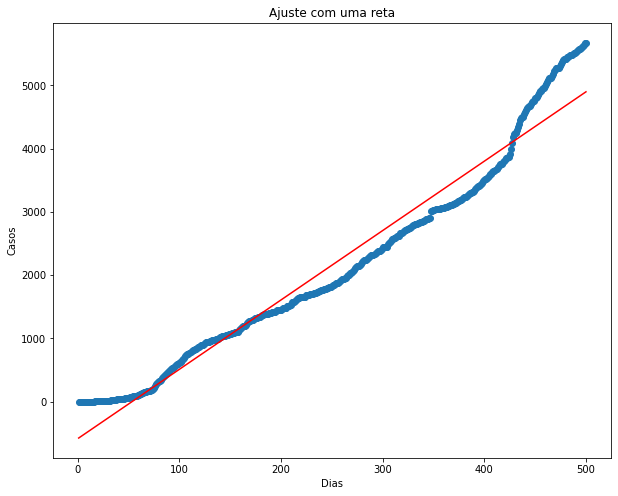

In [ ]:
reta_casos = ajuste_reta(dias, casos, 'Casos')

Reta = 0.8827236770753614*x + -24.723772849519555




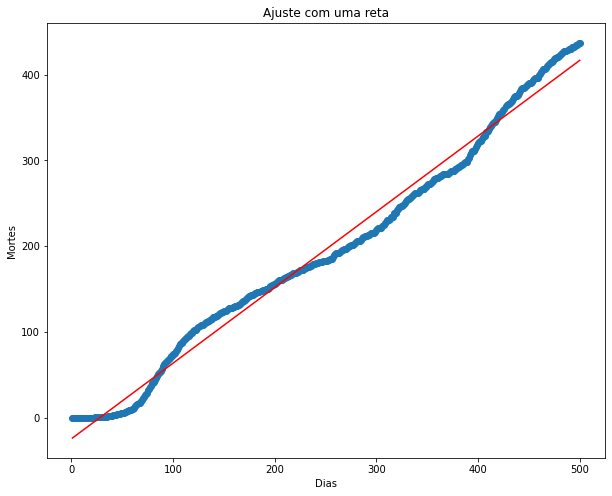

In [ ]:
reta_mortes = ajuste_reta(dias, mortes, 'Mortes')

Resposta:

Obtemos as seguintes retas:

Reta óbitos:  0.8827236770753614*x + -24.723772849519555

Reta casos:   10.965764348992478*x + -586.1921769831356

#Questão 2 e 3) 

-Lógica de impressão de gráfico

In [ ]:
#@title
dataset2 = df.values[500:546].astype(int)
dias2 = dataset2[:, 0] 
populacao2 =  dataset2[:, 3] 
casos2 = dataset2[:, 1] * 100000/populacao2 #dividido para transformar para a escala de casos/100k habitantes
mortes2 = dataset2[:, 2] * 100000/populacao2 #dividido para transformar para a escala de mortes/100k habitantes

In [ ]:
#@title
def prever_curva(x, y, theta, nome_y):
  pred = np.poly1d(theta)

  prediction = pred(x)

  print(f'Curva = {theta[0]}*x**2 + {theta[1]}*x + {theta[2]}\n\n')

  y_line = theta[2] + theta[1] * pow(x, 1) + theta[0] * pow(x, 2)


  plt.figure(figsize = (10,8))
  plt.scatter(x, y)
  plt.plot(x, prediction, 'r')
  plt.title('Estimativa utilizando a equação de 2 grau encontrada')
  plt.xlabel('Dias')
  plt.ylabel(nome_y)
  plt.show()

  return y_line

In [ ]:
#@title
def prever_reta(x, y, theta, nome_y):

  pred = np.poly1d(theta)

  prediction = pred(x)

  print(f'Reta = {theta[0]}*x + {theta[1]}\n\n')
 
  y_line = theta[1] + theta[0] * pow(x, 1)

  plt.figure(figsize = (10,8))
  plt.scatter(x, y)
  plt.plot(x, prediction, 'r')
  plt.title('Estimativa utilizando a reta encontrada na questão 1')
  plt.xlabel('Dias')
  plt.ylabel(nome_y)
  plt.show()

  return y_line

Estimativa de Casos:

Reta = 10.965764348992478*x + -586.1921769831356




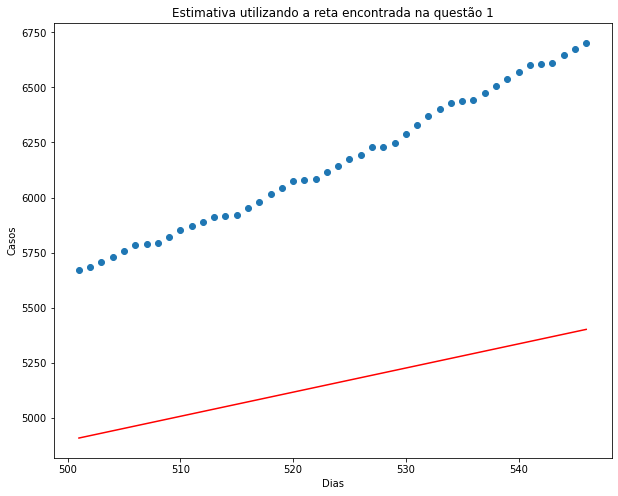

In [ ]:
previsao_casos_reta = prever_reta(dias2, casos2, reta_casos, 'Casos')

Estimativa de Óbitos:

Reta = 0.8827236770753614*x + -24.723772849519555




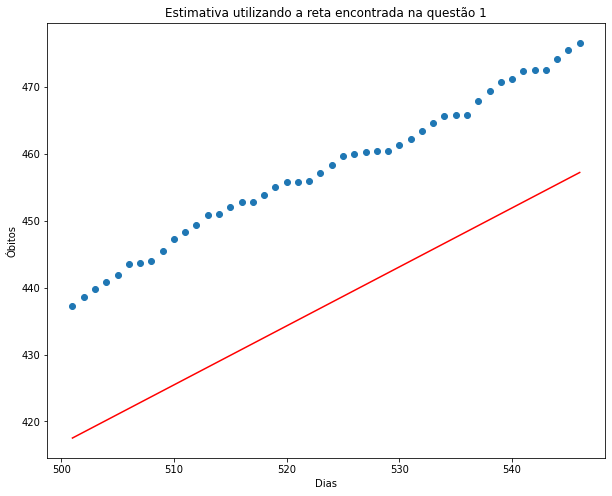

In [ ]:
previsao_mortes_reta = prever_reta(dias2, mortes2, reta_mortes ,'Óbitos')

Resposta: A estimativa não foi muito boa. Tendo em vista que uma reta foi utilizada como aproximação, e como os gráficos acima demonstram, a estimativa de mortes e casos após o dia 500 não foram excepcionais, se distanciando cada vez mais dos pontos à medida que a função progride.

#Questão 4) 

Encontrando curva de ajuste para número de casos:

Curva = 0.01422813286120357*x**2 + 3.8374697855294904*x + 10.208468159933544




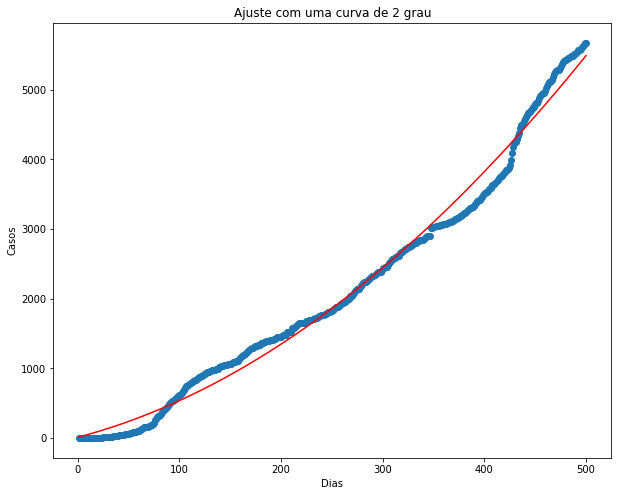

In [ ]:
theta_casos_curva = ajuste_curva(dias,casos, 'Casos')

Comparando a estimativa de casos com os valores reais a partir do dia 500:

Curva = 0.01422813286120357*x**2 + 3.8374697855294904*x + 10.208468159933544




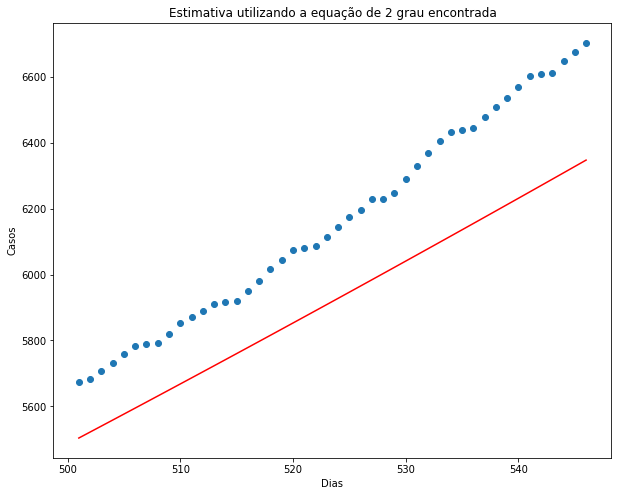

In [ ]:
previsao_casos_curva = prever_curva(dias2, casos2, theta_casos_curva ,'Casos')

Encontrando curva de ajuste para número de óbitos:

Curva = 0.00037667879642669264*x**2 + 0.6940076000655883*x + -8.934527739701918




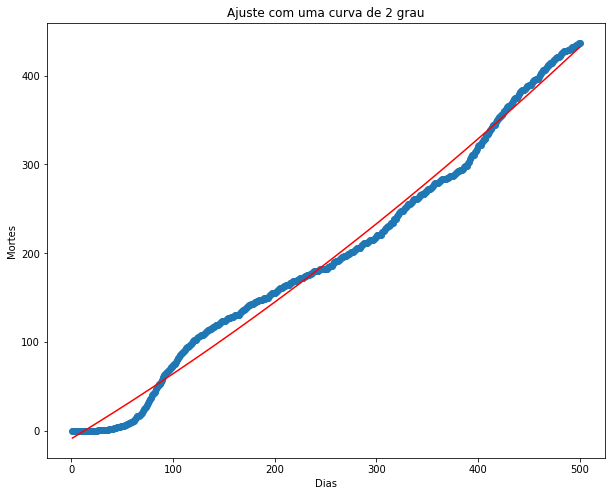

In [ ]:
theta_mortes_curva = ajuste_curva(dias, mortes, 'Mortes')

Comparando a estimativa de óbitos com os valores reais a partir do dia 500:

Curva = 0.00037667879642669264*x**2 + 0.6940076000655883*x + -8.934527739701918




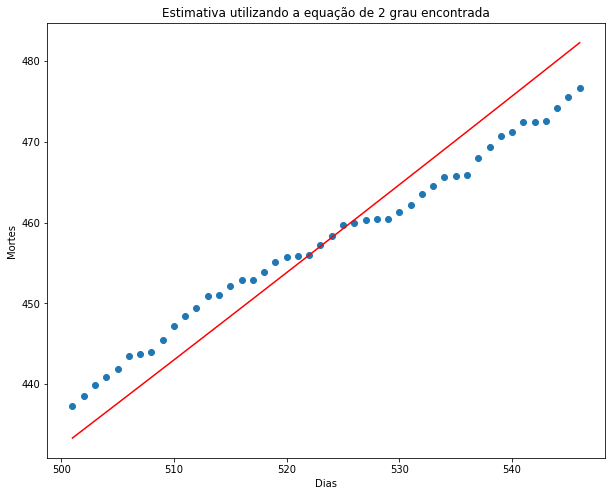

In [ ]:
previsao_mortes_curva =  prever_curva(dias2, mortes2, theta_mortes_curva ,'Mortes')

#Questão 5) 

Média de erros relativos de casos através da reta: 0.1621535467044458


Média de erros relativos de casos através do polinômio de segundo grau: 0.03822426335703124


Média de erros relativos de óbitos através do reta: 0.04405461812086159


Média de erros relativos de óbitos através do polinômio de segundo grau: 0.007562615759142457




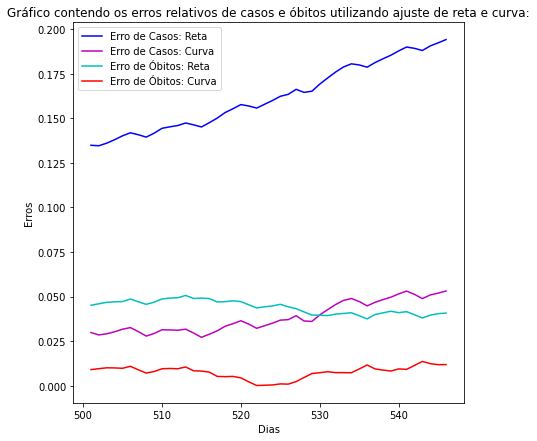

In [ ]:
#Cálculo e plot da média de erros relativos

erro_casos_reta = abs(previsao_casos_reta - casos2)/casos2
erro_casos_curva = abs(previsao_casos_curva - casos2)/casos2
erro_mortes_reta = abs(previsao_mortes_reta - mortes2)/mortes2
erro_mortes_curva = abs(previsao_mortes_curva - mortes2)/mortes2


print(f'Média de erros relativos de casos através da reta: {np.mean(erro_casos_reta)}\n\n')
print(f'Média de erros relativos de casos através do polinômio de segundo grau: {np.mean(erro_casos_curva)}\n\n')
print(f'Média de erros relativos de óbitos através do reta: {np.mean(erro_mortes_reta)}\n\n')
print(f'Média de erros relativos de óbitos através do polinômio de segundo grau: {np.mean(erro_mortes_curva)}\n\n')

plt.figure(figsize = (7,7))
plt.plot(dias2, erro_casos_reta, 'b-', label = "Erro de Casos: Reta")
plt.plot(dias2, erro_casos_curva, 'm-', label = "Erro de Casos: Curva")
plt.plot(dias2, erro_mortes_reta, 'c-', label = "Erro de Óbitos: Reta") 
plt.plot(dias2, erro_mortes_curva, 'r-', label = "Erro de Óbitos: Curva")


plt.xlabel('Dias')
plt.ylabel('Erros')
plt.title('Gráfico contendo os erros relativos de casos e óbitos utilizando ajuste de reta e curva:')
plt.grid(False)
plt.legend()
plt.show()


Resposta: Percebe-se que os erros obtidos através da utilização de um polinômio de segundo grau são significativamente menores que os erros obtidos através da utilização de uma reta para a previsão.

#Questão 6)

Para estimarmos a velocidade de propagração da doença, utilizaremos a derivada da curva de menor erro encontrada para o número de casos:

Curva: 
0.01422813286120357x² + 3.8374697855294904x + 10.208468159933544

Curva da velocidade: 
0.02845626572240714x + 3.8374697855294904

In [ ]:
#@title Lógica de plot
t = [0.02845626572240714, 3.8374697855294904]

def velocidade(x,y, nome_y, t):


  print(f'Reta = {t[0]}*x + {t[1]}\n\n')

  y_line = t[1] + t[0] * pow(x, 1)


  plt.figure(figsize = (10,8))
  plt.plot(x, y_line, 'r')
  plt.title('Velocidade de Propagação')
  plt.xlabel('Dias')
  plt.ylabel(nome_y)
  plt.show()

# dataset[:, i] -> retorna i-ésima coluna

dataset3 = df.values[0:546].astype(int)
dias3 = dataset3[:, 0] 
populacao3 =  dataset3[:, 3] 
casos3 = dataset3[:, 1] * 100000/populacao3 #dividido para transformar para a escala de casos/100k habitantes
mortes3 = dataset3[:, 2] * 100000/populacao3 #dividido para transformar para a escala de mortes/100k habitantes

Plot da função derivada:

Reta = 0.02845626572240714*x + 3.8374697855294904




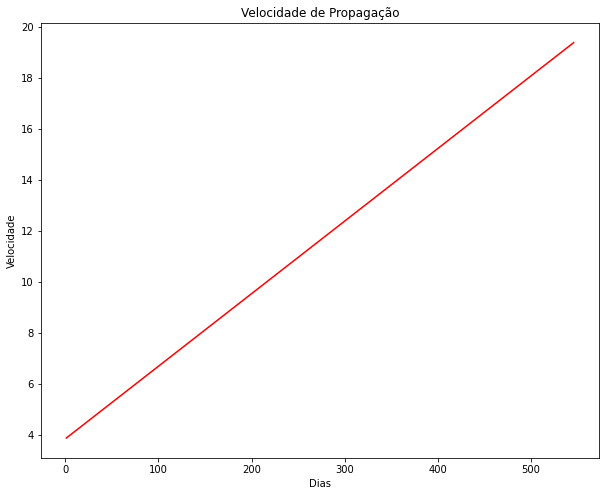

In [ ]:
velocidade(dias3,casos3, 'Velocidade', t)